# dataset 기반 프로젝트
- 작성자 : 202301777 정성윤

### 1. 설명
- 2011년부터 2021년까지의 지역의 인구수 데이터 셋
- 2011년부터 2021년까지의 지역의 집값 데이터 셋
- 2011년부터 2021년까지의 금리 데이터 셋

### 2. 주장
- 인구수가 증가하는 곳은 수요와 공급에 의해서 사람이 많이 모이는 곳은 집가격이 올라갈것이라고 생각했습니다.
- "유동성과 금리가 부동산가격 변동에 미치는 영향 분석"의 논문에 있는 "전국아파트가격과 금 리의 변동성은 이론식과 같이 금리가 상승하면 전국아파트가격은 하락하였다." 라는 부분에서 금리가 올라갈수록 부동산 가격이 내려갈것이라고 생각했습니다.

### 3. 회귀
- 위에 있는 데이터셋을 가지고 예측을 할 수 있지 않을까 생각해서 한번 해보았습니다.
- train은 2011년부터 2021년도의 데이터를 학습 시켰고 2022년도의 자료를 test셋으로 사용하였습니다.

### 4. 출처
- https://www.data.go.kr/data/15044283/fileData.do 한국부동산원_공동주택 실거래가격지수_아파트_월별 지역별 매매 데이터셋
- https://jumin.mois.go.kr/ageStatMonth.do 행정안전부_지역별(시도/시군구/읍면동) 연령별 주민등록 인구현황 데이터셋
- https://www.kci.go.kr/kciportal/ci/sereArticleSearch/ciSereArtiView.kci?sereArticleSearchBean.artiId=ART001639982 유동성과 금리가 부동산가격 변동에 미치는 영향 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
서울 = [] # 지역의 인구수
경기도 = []
전남 = []
전북 = []
충남 = []
충북 = []
제주 = []
울산 = []
years = []

a = [11,11,12,12,13,13,14,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21]
b = ["01","07"]
c = ["06","12"]

for i in range(len(a)):
    data = pd.read_csv(f"./20{a[i]}{b[i%2]}_20{a[i]}{c[i%2]}_연령별인구현황_월간.csv", encoding="cp949", index_col=0, header=0, thousands=",")
    if(i%2==0):
        years.append(f"{a[i]}")
        years.append(" ")
    for j in range(0,13*6, 13):
      서울.append(data.iloc[1][j]/1000000)
      경기도.append(data.iloc[9][j]/1000000)
      전남.append(data.iloc[13][j]/1000000)
      전북.append(data.iloc[12][j]/1000000)
      충남.append(data.iloc[11][j]/1000000)
      충북.append(data.iloc[10][j]/1000000)
      제주.append(data.iloc[17][j]/1000000)
      울산.append(data.iloc[7][j]/1000000)
      years.append(" ")
    
        

home서울 = [] # 지역의 집값
home경기도 = []
home부산 = []
home전남 = []
home전북 = []
home충남 = []
home충북 = []
home제주 = []
home울산 = []



data = pd.read_csv("./한국부동산원_공동주택 실거래가격지수_아파트_월별 지역별 매매_20230228.csv", encoding="cp949")
for i in range(61,data.shape[1]-14):
  home서울.append(data.iloc[6][i])
  home경기도.append(data.iloc[19][i])
  home부산.append(data.iloc[16][i])
  home전남.append(data.iloc[24][i])
  home전북.append(data.iloc[23][i])
  home충남.append(data.iloc[22][i])
  home충북.append(data.iloc[21][i])
  home제주.append(data.iloc[27][i])
  home울산.append(data.iloc[17][i])

금리 = [] # 2021년도부터의 금리
data = pd.read_csv("./기준금리.csv")
for i in range(1,data.shape[1]-12):
  금리.append(data.iloc[0][i])

지역 이름이 붙은건 그 지역의 매월 인구수가 들어가있는 리스트입니다. ex(서울)

home지역은 그 지역의 매월 부동산 가격입니다. ex(home서울)

금리는 원하는 데이터셋을 찾지 못해서 직접 만들었습니다. 매월 금리를 넣은 리스트입니다.

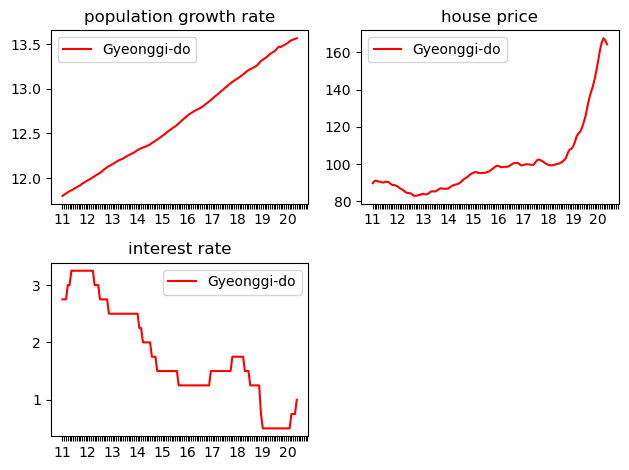

In [3]:
plt.subplot(2,2,1)
plt.title("population growth rate")
plt.xticks(range(len(years)), years)
plt.plot(경기도, color="red", label="Gyeonggi-do")
plt.legend()
plt.subplot(2,2,2)
plt.title("house price")
plt.xticks(range(len(years)), years)
plt.plot(home경기도, color="red", label="Gyeonggi-do")
plt.legend()
plt.tight_layout()
plt.subplot(2,2,3)
plt.title("interest rate")
plt.xticks(range(len(years)), years)
plt.plot(금리, color="red", label="Gyeonggi-do")
plt.legend()
plt.tight_layout()
plt.show()

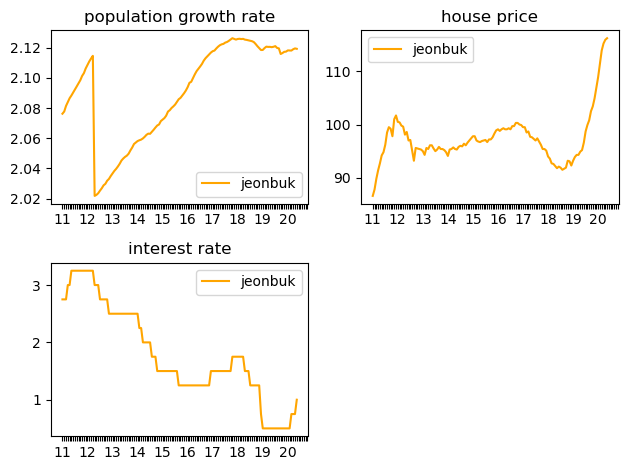

In [4]:
plt.subplot(2,2,1)
plt.title("population growth rate")
plt.xticks(range(len(years)), years)
plt.plot(전북, color="orange", label="jeonbuk")
plt.legend()
plt.subplot(2,2,2)
plt.title("house price")
plt.xticks(range(len(years)), years)
plt.plot(home전북, color="orange", label="jeonbuk")
plt.legend()
plt.tight_layout()
plt.subplot(2,2,3)
plt.title("interest rate")
plt.xticks(range(len(years)), years)
plt.plot(금리, color="orange", label="jeonbuk")
plt.legend()
plt.tight_layout()
plt.show()

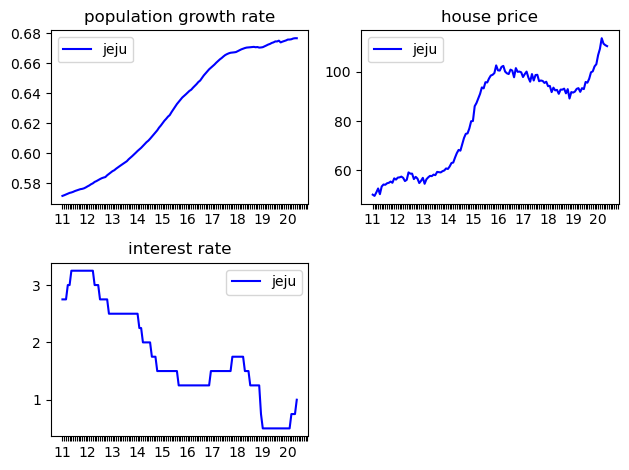

In [6]:
plt.subplot(2,2,1)
plt.title("population growth rate")
plt.xticks(range(len(years)), years)
plt.plot(제주, color="blue", label="jeju")
plt.legend()
plt.subplot(2,2,2)
plt.title("house price")
plt.xticks(range(len(years)), years)
plt.plot(home제주, color="blue", label="jeju")
plt.legend()
plt.tight_layout()
plt.subplot(2,2,3)
plt.title("interest rate")
plt.xticks(range(len(years)), years)
plt.plot(금리, color="blue", label="jeju")
plt.legend()
plt.tight_layout()
plt.show()

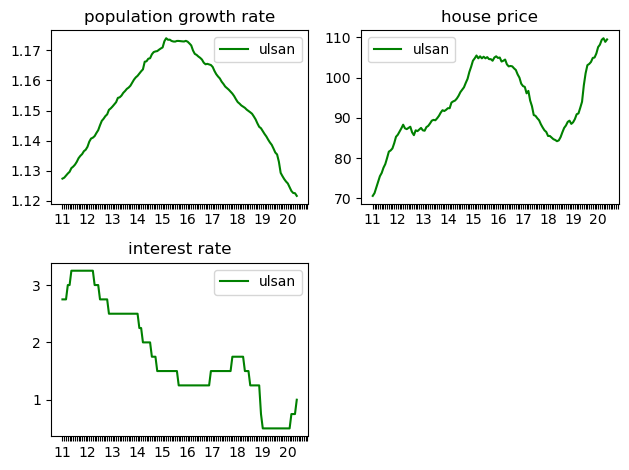

In [7]:
plt.subplot(2,2,1)
plt.title("population growth rate")
plt.xticks(range(len(years)), years)
plt.plot(울산, color="green", label="ulsan")
plt.legend()
plt.subplot(2,2,2)
plt.title("house price")
plt.xticks(range(len(years)), years)
plt.plot(home울산, color="green", label="ulsan")
plt.legend()
plt.tight_layout()
plt.subplot(2,2,3)
plt.title("interest rate")
plt.xticks(range(len(years)), years)
plt.plot(금리, color="green", label="ulsan")
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
import tensorflow as tf
import numpy as np
from keras import models
from keras import layers
from keras.layers import LSTM

In [9]:
X_data = np.array([서울, 경기도, 전남, 전북, 충남, 충북, 제주, 울산])
Y_data = np.array([home서울, home경기도, home전남, home전북, home충남, home충북, home제주, home울산])
# x_data = x_data.T
# y_data = y_data.T

In [10]:
x_data = np.array([])
y_data = np.array([])
x_data = np.array(금리)
y_data = np.array(Y_data[6])
# size = X_data[1].size
# for i in np.arange(0,size,3):
#   x_data = np.append(x_data,np.mean(X_data[1][i:i+3]))
#   y_data = np.append(y_data,np.mean(X_data[1][i:i+3]))
# for i in np.arange(0,size,4):
#   x_data = np.append(x_data,np.mean(X_data[1][i:i+4]))
#   y_data = np.append(y_data,np.mean(X_data[1][i:i+4]))
# for i in np.arange(0,size,6):
#   x_data = np.append(x_data,np.mean(X_data[1][i:i+6]))
#   y_data = np.append(y_data,np.mean(X_data[1][i:i+6]))
# for i in np.arange(0,size,11):
#   x_data = np.append(x_data,np.mean(X_data[1][i:i+11]))
#   y_data = np.append(y_data,np.mean(X_data[1][i:i+11]))
# for i in np.arange(0,size,12):
#   x_data = np.append(x_data,np.mean(X_data[1][i:i+12]))
#   y_data = np.append(y_data,np.mean(X_data[1][i:i+12]))

데이터 수가 너무 적어서 data augmentation을 해보려고 했는데 결과가 오히려 더 안좋게 나와서 하지 않았습니다.


In [11]:
x_data.shape , y_data.shape

((132,), (132,))

In [12]:
mean = x_data.mean(axis=0)
x_data -= mean
std = x_data.std(axis=0)
x_data /= std

In [13]:
from keras import models
from keras import layers

train_data = x_data
train_targets = y_data

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=((1,))))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [14]:
import numpy as np

k = 5

num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores.append(val_mae)


Epoch 1/100


2023-06-17 20:37:53.467326: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7/7 [==============================] - 0s 14ms/step - loss: 7873.0088 - mae: 87.2157
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 7835.5361 - mae: 87.0118
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 7801.6851 - mae: 86.8332
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 7762.2441 - mae: 86.6293
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 7724.4795 - mae: 86.4319
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 7680.3716 - mae: 86.1981
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 7624.8066 - mae: 85.9115
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 7567.7676 - mae: 85.6126
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 7502.4819 - mae: 85.2727
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 7435.4043 - mae: 84.9180
Epoch 11/100
7/7 [==============================] 

cross validation 체크를 통해 test셋에 대한 overfitting되는 걸 방지했습니다.

In [15]:
print(all_scores)

[5.915223121643066, 56.486019134521484, 44.55171203613281, 59.012088775634766, 14.48569393157959]


In [16]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate( 
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model() 
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=1)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)


Epoch 1/500
7/7 [==============================] - 0s 31ms/step - loss: 7881.6572 - mae: 87.2616 - val_loss: 9431.2939 - val_mae: 96.8841
Epoch 2/500
7/7 [==============================] - 0s 10ms/step - loss: 7857.1724 - mae: 87.1262 - val_loss: 9418.3184 - val_mae: 96.8173
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 7839.9668 - mae: 87.0287 - val_loss: 9422.9473 - val_mae: 96.8420
Epoch 4/500
7/7 [==============================] - 0s 8ms/step - loss: 7819.8491 - mae: 86.9216 - val_loss: 9430.5254 - val_mae: 96.8820
Epoch 5/500
7/7 [==============================] - 0s 8ms/step - loss: 7799.0771 - mae: 86.8132 - val_loss: 9457.1260 - val_mae: 97.0207
Epoch 6/500
7/7 [==============================] - 0s 8ms/step - loss: 7775.0474 - mae: 86.6914 - val_loss: 9486.2939 - val_mae: 97.1725
Epoch 7/500
7/7 [==============================] - 0s 8ms/step - loss: 7748.0166 - mae: 86.5535 - val_loss: 9527.4248 - val_mae: 97.3859
Epoch 8/500
7/7 [======================

In [17]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

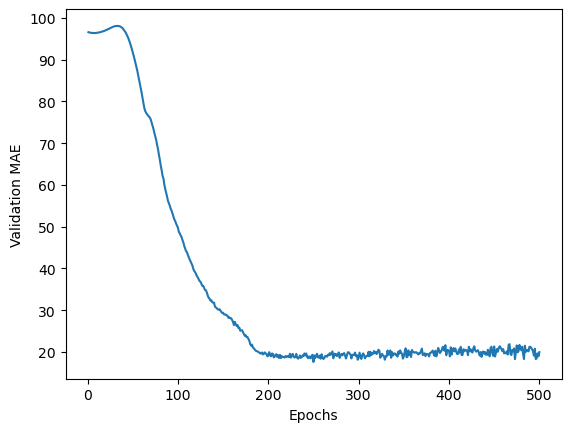

In [18]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

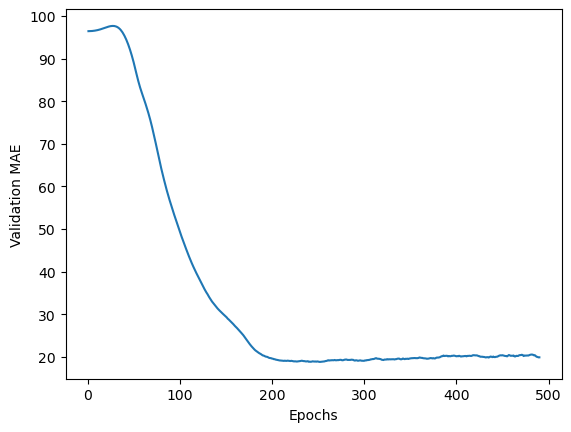

In [19]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [20]:
제주1 = []
years = []

a = [22,22]
b = ["01","07"]
c = ["06","12"]

for i in range(len(a)):
    data = pd.read_csv(f"./20{a[i]}{b[i%2]}_20{a[i]}{c[i%2]}_연령별인구현황_월간.csv", encoding="cp949", index_col=0, header=0, thousands=",")
    if(i%2==0):
        years.append(f"{a[i]}")
        years.append(" ")
    for j in range(0,13*6,13):
      제주1.append(data.iloc[7][j]/1000000)
      years.append(" ")
        

home제주1 = []

data = pd.read_csv("./한국부동산원_공동주택 실거래가격지수_아파트_월별 지역별 매매_20230228.csv", encoding="cp949")
for i in range(data.shape[1]-14,data.shape[1]):
  home제주1.append(data.iloc[17][i])

금리1 = []
data = pd.read_csv("./기준금리.csv")
for i in range(data.shape[1]-12,data.shape[1]):
  금리1.append(data.iloc[0][i])


home제주1 = home제주1[:12]

test_data = np.array(금리1)

test_targets = np.array(home제주1)

test_data -= mean
test_targets /= std

test_data.shape, test_targets.shape, train_data.shape, train_targets.shape

((12,), (12,), (132,), (132,))

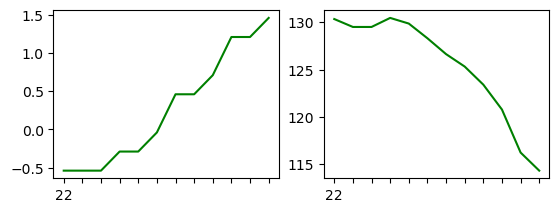

In [21]:
plt.subplot(2,2,1)
plt.xticks(range(len(years)), years)
plt.plot(test_data, color="green")
plt.subplot(2,2,2)
plt.xticks(range(len(years)), years)
plt.plot(test_targets, color="green")

In [22]:
model = build_model()
model.fit(train_data, train_targets, epochs=300, batch_size=16, verbose=1)

Epoch 1/300
9/9 [==============================] - 0s 13ms/step - loss: 6934.1479 - mae: 80.9494
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 6886.9248 - mae: 80.7374
Epoch 3/300
9/9 [==============================] - 0s 5ms/step - loss: 6850.7261 - mae: 80.5840
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 6813.0762 - mae: 80.4124
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 6773.9282 - mae: 80.2407
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 6729.6895 - mae: 80.0492
Epoch 7/300
9/9 [==============================] - 0s 5ms/step - loss: 6684.4971 - mae: 79.8581
Epoch 8/300
9/9 [==============================] - 0s 5ms/step - loss: 6640.4810 - mae: 79.6558
Epoch 9/300
9/9 [==============================] - 0s 5ms/step - loss: 6585.8916 - mae: 79.4090
Epoch 10/300
9/9 [==============================] - 0s 5ms/step - loss: 6529.3267 - mae: 79.1599
Epoch 11/300
9/9 [====================

In [23]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

1/1 [==============================] - 0s 81ms/step - loss: 2233.2922 - mae: 46.6717


46.67169189453125

느낀점 : 인구수가 집값에 영향을 크게 주지는 못하는거 같고 금리가 그나마 인구수보다 집값과 관련이 있는거 같습니다.
       이번 프로젝트를 하면서 배운건 집값을 예측하기에는 아주 많은 영향들이 작용해서 몇개의 데이터 셋을 가지고는 예측하는게 어렵다고 판단했습니다.

